# IMPORTANDO A BASE DE DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.width', 400)         # MOSTRAR TODAS AS COLUNAS HORIZONTALMENTE
pd.set_option('display.max_columns', None)  # NÃO HÁ LIMITE DE COLUNAS PRA MOSTRAR
pd.set_option('display.max_rows', 10)       # MOSTRA SEMPRE 10 LINHAS

In [3]:
df = pd.read_csv(r'CleanDataBase.csv')
df.head(5)

,Nome,Genero,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,TipoContrato,FormaPagamento,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,Aposentado,Dependentes,ServicoTelefone,Casado,FaturaDigital,ValorMensal,TotalGasto,Mês de Assinatura,MesesComoCliente,Churn,Mês,Pagamento
0,Celio Nunes da Silva,Masculino,Sim,Fibra,Sim,Sim,2 Anos,BoletoEletronico,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,122.00,122.00,2022-01-23,0,Não,Janeiro,Em Dia
1,Klauss Miranda Marchi,Masculino,Não,Fibra,Sim,Não,2 Anos,DebitoAutomatico,Não,Sem Internet,Sim,Não,Não,Não,Não,Não,Não,82.00,82.00,2022-01-23,0,Não,Janeiro,Em Dia
2,Isabella Braga,Masculino,Sim,Nao,SemInternet,SemInternet,2 anos,CartaoCredito,SemInternet,SemInternet,SemInternet,SemInternet,0,Sim,Sim,Sim,Nao,74.95,2869.85,2017-06-05,38,Sim,Junho,Atrasado
3,Gael Teixeira,Feminino,Nao,Fibra,Nao,Sim,Mensal,CartaoCredito,Sim,Nao,Sim,Nao,0,Nao,Sim,Nao,Sim,55.90,238.50,2021-01-25,4,Nao,Janeiro,Atrasado
4,Manuela Teixeira,Feminino,Sim,Fibra,Nao,Nao,Mensal,DebitoAutomatico,Nao,Nao,Nao,Nao,1,Nao,Sim,Sim,Sim,53.45,119.50,2018-10-21,2,Nao,Outubro,Atrasado


In [4]:
def parseCategoric(val):
    if val == 'Sim':
        return '1'
    if val == 'Não' or val == 'Nao':
        return '0'
    return val
    

columns = []

for column in df.columns:
    df[column] = df[column].apply(parseCategoric)

df.head()

,Nome,Genero,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,TipoContrato,FormaPagamento,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,Aposentado,Dependentes,ServicoTelefone,Casado,FaturaDigital,ValorMensal,TotalGasto,Mês de Assinatura,MesesComoCliente,Churn,Mês,Pagamento
0,Celio Nunes da Silva,Masculino,1,Fibra,1,1,2 Anos,BoletoEletronico,1,1,1,1,0,0,0,0,0,122.00,122.00,2022-01-23,0,0,Janeiro,Em Dia
1,Klauss Miranda Marchi,Masculino,0,Fibra,1,0,2 Anos,DebitoAutomatico,0,Sem Internet,1,0,0,0,0,0,0,82.00,82.00,2022-01-23,0,0,Janeiro,Em Dia
2,Isabella Braga,Masculino,1,0,SemInternet,SemInternet,2 anos,CartaoCredito,SemInternet,SemInternet,SemInternet,SemInternet,0,1,1,1,0,74.95,2869.85,2017-06-05,38,1,Junho,Atrasado
3,Gael Teixeira,Feminino,0,Fibra,0,1,Mensal,CartaoCredito,1,0,1,0,0,0,1,0,1,55.90,238.50,2021-01-25,4,0,Janeiro,Atrasado
4,Manuela Teixeira,Feminino,1,Fibra,0,0,Mensal,DebitoAutomatico,0,0,0,0,1,0,1,1,1,53.45,119.50,2018-10-21,2,0,Outubro,Atrasado


# ANÁLISE MATEMÁTICA
Realizando operações matemáticas de estatística na tabela para encontrar padrões e conclusões sobre os dados

### Porcentagem

Começando do básico, vamos ver quantas pessoas estão com o pagamento atrasado (porcentagem). Primeiramente vamos colocar toda a coluna "pagamento" das pessoas em uma lista, para realizar operações com essa coluna em forma de vetor

In [5]:
list(df['Pagamento'].unique())

['Em Dia', 'Atrasado']

In [6]:
contagemAtrasados = df.loc[df['Pagamento'] == 'Atrasado'].shape[0]
contagemAtrasados

191

Vamos agora ver qual a porcentagem dos usuários que estão com o pagamento atrasado em relação ao total de usuários (shape[0] é o tamanho do vetor)

In [7]:
porcentagem = contagemAtrasados/len(df) * 100
porcentagem

96.46464646464646

### Média e Desvio Padrão
Calculando a média e o desvio padrão (o quanto os valores variam em relação a média) dos meses como cliente dos usuários

In [8]:
media = df['MesesComoCliente'].mean()
desvio = df['MesesComoCliente'].std()

media, desvio

(33.388888888888886, 25.92600320940325)

### Gráfico do Tempo

In [9]:
anos = pd.DatetimeIndex(df['Mês de Assinatura']).year
anos

Index([2022, 2022, 2017, 2021, 2018, 2019, 2020, 2021, 2018, 2017,
       ...
       2017, 2020, 2016, 2021, 2017, 2018, 2020, 2020, 2019, 2017], dtype='int32', name='Mês de Assinatura', length=198)

In [10]:
x = np.sort(anos.unique())
x

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [11]:
y = np.zeros(len(x))

for i, data in enumerate(x):
    y[i] = np.count_nonzero(anos == data)
    
y

array([31., 32., 31., 33., 33., 36.,  2.])

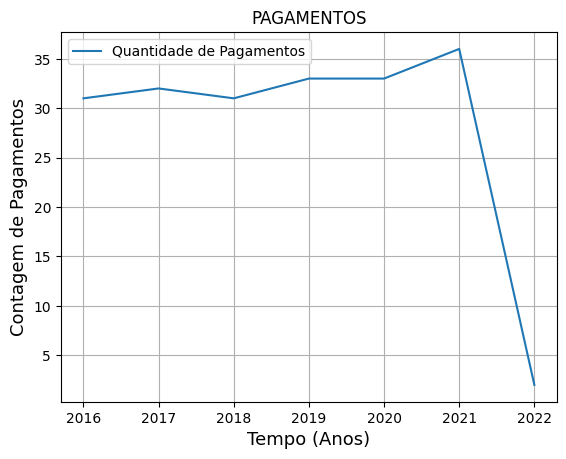

In [12]:
plt.plot(x, y, label='Quantidade de Pagamentos')
plt.title('PAGAMENTOS')
plt.xlabel('Tempo (Anos)', fontsize=13)
plt.ylabel('Contagem de Pagamentos', fontsize=13)

plt.legend()
plt.grid()
plt.show()

# GRÁFICO DE CORRELAÇÃO
Quanto mais próximo os valores estão de 1, maior a correlação entre eles, -1 é uma correlação inversa, onde se um aumenta, o outro diminui

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

VALORES QUE POSSUEM CORRELAÇÃO LINEAR:


,ValorMensal,TotalGasto,MesesComoCliente
ValorMensal,1.000000,0.651694,0.246244
TotalGasto,0.651694,1.000000,0.803824
MesesComoCliente,0.246244,0.803824,1.000000


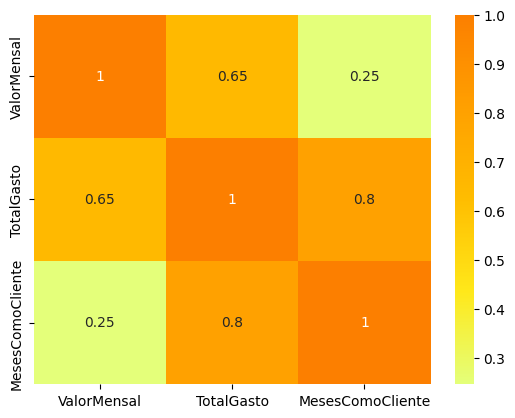

In [14]:
numericColumns = df.columns[df.dtypes != 'object']

print('VALORES QUE POSSUEM CORRELAÇÃO LINEAR:')
display(df[numericColumns].corr())

sns.heatmap(df[numericColumns].corr(), annot=True, cmap='Wistia') # (CORRELAÇÃO, COM VALORES, CORES)
plt.show()

Vemos aqui que o total gasto tem relação direta com meses como cliente (quanto maior o total gasto, mais tempo a pessoa está como cliente na empresa).

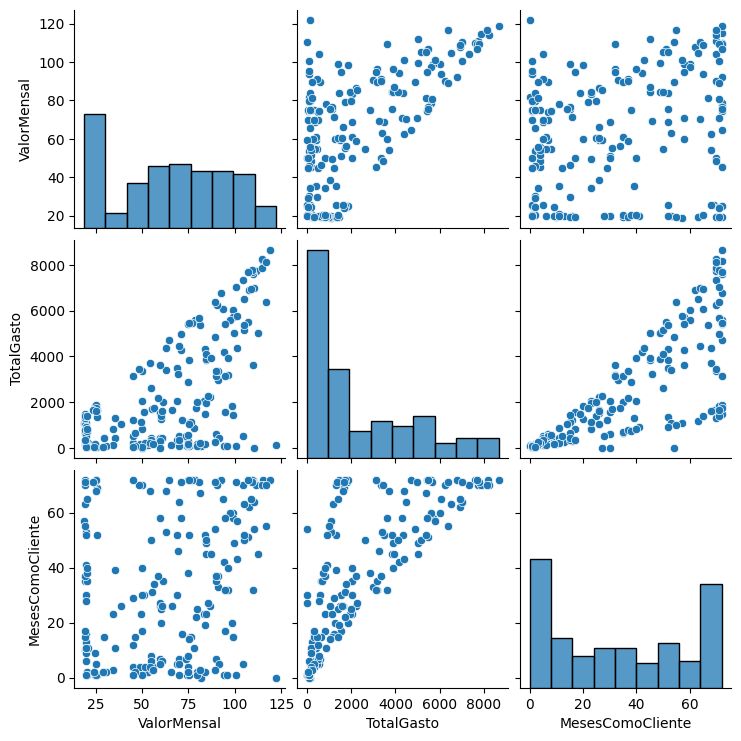

In [15]:
sns.pairplot(df[numericColumns])
plt.show()

# COMPARANDO COLUNAS
Comparando todas as colunas da tabela para saber quais são as variáveis que alteram diretamente o churn (cancelamento).

In [16]:
import plotly.express as px

### OBSERVAÇÕES 

#### CLIENTES COM FAMÍLIAS MAIORES TENDEM A CANCELAR MENOS
- MesesComoCliente baixo tem muito cancelamento
- Problema com retenção de clientes nos primeiros meses
- IDEIA: Vamos criar um programa para incentivar clientes nos primeiros meses

#### OS CLIENTES COM FIBRA TEM MUITO MAIS CHANCES DE CANCELAR
- Problema no serviço de fibra

#### QUANTO MAIS SERVIÇOS O CLIENTE TEM, MENOR A CHANCE DELE CANCELAR
- Fornecer mais serviços

#### MUITO CANCELAMENTO EM CONTRATO MENSAL
- Incentivar o cliente a ir para o contrato anual

#### FORMA DE PAGAMENTO
- Evitar boleto eletrônico, gera mais cancelamentos, dar desconto para débito automático

In [17]:
for coluna in df:
    grafico = px.histogram(df, x=coluna, color="Churn", histnorm='percent', width=700, height=400)
    grafico.update_traces(marker_line_width=1, marker_line_color="black")
    grafico.show()